In [4]:
# regression example, generate random linear-ish data
# then we use the normal equation to fit

import numpy as np 
x = 2 * np.random.rand(100,1)
y = 4+3*x + np.random.randn(100,1)
x_b = np.c_[np.ones((100,1)), x]
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

theta_best

array([[4.16358106],
       [2.86574991]])

In [5]:
# using this line to make predictions

x_new = np.array([[0],[2]])
x_new_b = np.c_[np.ones((2,1)), x_new]
y_predict = x_new_b.dot(theta_best)
y_predict

array([[4.16358106],
       [9.89508089]])

In [6]:
# simple regression

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.16358106]), array([[2.86574991]]))

In [7]:
# can make predictions with our fitted regression

lin_reg.predict(x_new)

array([[4.16358106],
       [9.89508089]])

In [8]:
# batch gradient descent implementation

eta = 0.1 
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients=2/m * x_b.T.dot(x_b.dot(theta)-y)
    theta = theta - eta * gradients
theta

array([[4.16358106],
       [2.86574991]])

In [9]:
# stochastic gradient descent

n_epochs = 50
t0, t1 = 5, 50
def learning_schedule(t):
    return t0 / (t+t1)
theta = np.random.randn(2,1)
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients=2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
theta

array([[4.12723295],
       [2.86711306]])

In [10]:
m = 600
x = 6 * np.random.randn(m, 1) - 3
y = 0.5 * x **2 + x + 2 + np.random.randn(m, 1)

In [11]:
# polynomial regression for when data is non linear

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)
print(x[0])
x_poly[0]

[1.80183458]


array([1.80183458, 3.24660786])

In [12]:
# fit a regression to our poly features

lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.06054188]), array([[0.99385809, 0.49789501]]))

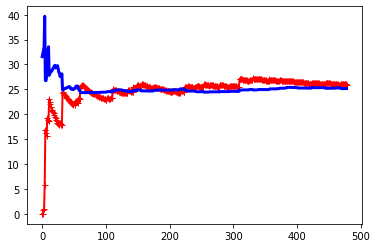

In [13]:
# plots of model performance vs dataset size, aka learning curves

# model is underfitting so it plateaus with a large error

import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, x, y):
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(x_train)):
        model.fit(x_train[:m], y_train[:m])
        y_train_predict = model.predict(x_train[:m])
        y_val_predict = model.predict(x_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, x, y)

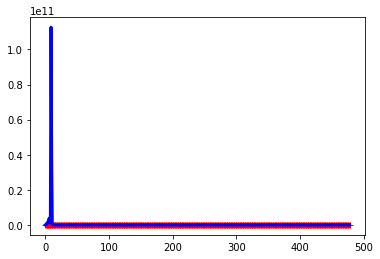

In [11]:
# same curve of a 10th degree polynomial regression
#  model performs better on training than validation aka overfitting

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, x, y)

In [12]:
# ridge regression, regression with a regularizer

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(x, y)
ridge_reg.predict([[1.5]])

array([[8.65824438]])

In [13]:
# sgd regression but we have an l2 reg

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(x, y.ravel())
sgd_reg.predict([[1.5]])

array([10.48163616])

In [14]:
#lasso regression, another type of regularized regression

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x,y)
lasso_reg.predict([[1.5]])

array([8.67234287])

In [15]:
# elastic net, a mix between ridge and lasso regressions

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(x,y)
elastic_net.predict([[1.5]])

array([8.6827003])

In [16]:
# regression with early stopping

from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)
x_train_poly_scaled = poly_scaler.fit_transform(x_train)
x_val_poly_scaled = poly_scaler.transform(x_val)
sgd_reg = SGDRegressor(warm_start=True, penalty=None, learning_rate="constant")

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(x_train_poly_scaled, y_train.ravel())
    y_val_predict = sgd_reg.predict(x_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error= val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
        


In [17]:
best_model

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=True)

In [18]:
minimum_val_error

2.9383946782636373e+20

In [19]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [20]:
x = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(np.int)

In [21]:
# logistic regression is used for binary classification
# instead of directly outputting function results, it outputs the logistic function of the output
# it then uses the output of this function to make a prediction (classification)

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="liblinear", random_state=42)
log_reg.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

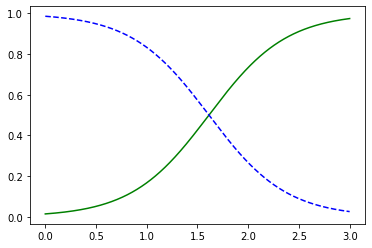

In [22]:
# outputs of log regression function plotted, these outputs can then be used to classify
# predict_proba gives the score
# predict gives the classification

x_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(x_new)
plt.plot(x_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(x_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

In [23]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

In [24]:
# softmax regression allows multiclass classification

x = iris["data"][:, (2,3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(x, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
softmax_reg.pre